# Задание на самопроверку

Необходимо:

- Считать данные из Excel в DataFrame (Data_Parsing) и (Data_Company).
- Подтянуть к базе парсинга данные из базы компании (item_id, color_id, current_price) и сформировать столбец разницы цен в % (цена конкурента к нашей цене).
- Определить сильные отклонения от среднего в разности цен в пределах бренда-категории (то есть убрать случайные выбросы, сильно искажающие сравнение). Критерий — по вкусу, написать комментарий в коде.
- Записать новый файл Excel с базой парсинга, приклееными к ней столбцами из пункта 2 и с учётом пункта 3 (можно добавить столбец outlier и проставить Yes для выбросов).

In [322]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Считать данные
parsing_data = pd.read_excel(io='Data/Data_TSUM.xlsx', sheet_name='Data_Parsing')
company_data = pd.read_excel(io='Data/Data_TSUM.xlsx', sheet_name='Data_Company')

display(parsing_data.tail(10), company_data.tail(10))
display(parsing_data.isnull().sum(), company_data.isnull().sum())

,brand,Category,producer_id,producer_color,price
65,Stone Island,Bags,sssss1111_26,~~~red,255
66,Stone Island,Bags,sssss1111_27,~~~red,188
67,Stone Island,Bags,sssss1111_28,~~~red,171
68,Stone Island,Bags,sssss1111_29,~~~red,243
69,Stone Island,Bags,sssss1111_30,~~~red,271
70,Stone Island,Bags,sssss1111_31,~~~red,164
71,Stone Island,Bags,sssss1111_32,~~~red,158
72,Stone Island,Bags,sssss1111_33,~~~red,194
73,Stone Island,Bags,sssss1111_34,~~~red,256
74,Stone Island,Bags,sssss1111_35,~~~red,205


,brand,Category,item_id,color_id,current price
65,Stone Island,Bags,sssss111126,red,159
66,Stone Island,Bags,sssss111127,red,275
67,Stone Island,Bags,sssss111128,red,184
68,Stone Island,Bags,sssss111129,red,223
69,Stone Island,Bags,sssss111130,red,229
70,Stone Island,Bags,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,222
74,Stone Island,Bags,sssss111135,red,275


brand             0
Category          0
producer_id       0
producer_color    0
price             0
dtype: int64

brand            0
Category         0
item_id          0
color_id         0
current price    0
dtype: int64

В таблицах пропущенных значений нет

In [323]:
# Подтянуть данные (соединить таблицы)
united_df = parsing_data.merge(
    company_data,
    on=['brand', 'Category'],
    how='outer'
)

display(united_df.tail(10))
display(united_df.isnull().sum())

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price
941,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111126,red,159
942,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111127,red,275
943,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111128,red,184
944,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111129,red,223
945,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111130,red,229
946,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111131,red,165
947,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111132,red,196
948,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111133,red,236
949,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111134,red,222
950,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111135,red,275


brand             0
Category          0
producer_id       0
producer_color    0
price             0
item_id           0
color_id          0
current price     0
dtype: int64

In [356]:
# Создать новый признак (сформировать столбец разницы цен в % (цена конкурента к нашей цене).
united_df['price_diff'] = (united_df['current price'] - united_df['price']) / united_df['current price'] * 100
display(united_df['price_diff'].isnull().sum())
display(united_df.tail(20))

0

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,price_diff,outlier
931,Stone Island,Bags,sssss1111_34,~~~red,256,sssss111127,red,275,6.909091,No
932,Stone Island,Bags,sssss1111_34,~~~red,256,sssss111128,red,184,-39.130435,No
933,Stone Island,Bags,sssss1111_34,~~~red,256,sssss111129,red,223,-14.798206,No
934,Stone Island,Bags,sssss1111_34,~~~red,256,sssss111130,red,229,-11.790393,No
935,Stone Island,Bags,sssss1111_34,~~~red,256,sssss111131,red,165,-55.151515,No
936,Stone Island,Bags,sssss1111_34,~~~red,256,sssss111132,red,196,-30.612245,No
937,Stone Island,Bags,sssss1111_34,~~~red,256,sssss111133,red,236,-8.474576,No
938,Stone Island,Bags,sssss1111_34,~~~red,256,sssss111134,red,222,-15.315315,No
939,Stone Island,Bags,sssss1111_34,~~~red,256,sssss111135,red,275,6.909091,No
940,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111125,red,236,13.135593,No


In [357]:
# Определить сильные отклонения от среднего в разности цен в пределах бренда-категории 
# (то есть убрать случайные выбросы, сильно искажающие сравнение). Критерий — по вкусу, написать комментарий в коде.
stone_island_bags = united_df[united_df['brand'] == 'Stone Island']
stone_island_bags = stone_island_bags[stone_island_bags['Category'] == 'Bags']
display(stone_island_bags)

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,price_diff,outlier
830,Stone Island,Bags,sssss1111_25,~~~red,210,sssss111125,red,236,11.016949,No
831,Stone Island,Bags,sssss1111_25,~~~red,210,sssss111126,red,159,-32.075472,No
832,Stone Island,Bags,sssss1111_25,~~~red,210,sssss111127,red,275,23.636364,No
833,Stone Island,Bags,sssss1111_25,~~~red,210,sssss111128,red,184,-14.130435,No
834,Stone Island,Bags,sssss1111_25,~~~red,210,sssss111129,red,223,5.829596,No
...,...,...,...,...,...,...,...,...,...,...
946,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111131,red,165,-24.242424,No
947,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111132,red,196,-4.591837,No
948,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111133,red,236,13.135593,No
949,Stone Island,Bags,sssss1111_35,~~~red,205,sssss111134,red,222,7.657658,No


'Число выбросов по методу z-отклонений: 0'

'Результирующее число записей: 121'

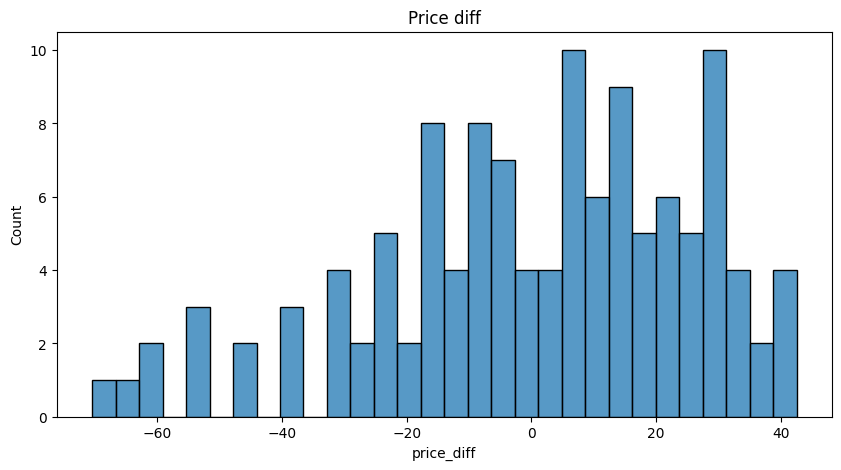

In [358]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale: # логарифмический масштаб (если установим, то будет прибавлять единицу)
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    mu = x.mean() # мю - среднее значение
    sigma = x.std() # сигма - стандартное отклонение
    bound_lower = mu - 3 * sigma # левая граница графика (нижняя граница) U - 3Q
    bound_upper = mu + 3 * sigma # правая граница графика (верхняя граница) U + 3Q
    outliers = data[(x < bound_lower) | (x > bound_upper)]
    cleaned = data[(x >= bound_lower) & (x <= bound_upper)]
    return outliers, cleaned

# Расчет выбросов по методу Z отклонений
outliers, cleaned = outliers_z_score(data=stone_island_bags, feature='price_diff', log_scale=False)
display(f'Число выбросов по методу z-отклонений: {outliers.shape[0]}')
display(f'Результирующее число записей: {cleaned.shape[0]}')

# постройка гистограммы
fig = plt.figure(figsize=(10, 5))
histplot = sns.histplot(data=cleaned['price_diff'], bins=30)
histplot.set_title('Price diff');

In [364]:
# Записать новый файл Excel с базой парсинга, приклееными к ней столбцами из пункта 2 
# и с учётом пункта 3 (можно добавить столбец outlier и проставить Yes для выбросов)

# Проставляем outlier
united_df['outlier'] = 'Yes' if outliers.shape[0] != 0 else 'No'
display(f'Yes: {united_df[united_df['outlier'] == 'Yes'].shape[0]}')
display(f'No: {united_df[united_df['outlier'] == 'No'].shape[0]}')

# Записать в файл
new_data_tsum = united_df.to_excel(excel_writer='Data/new_data_tsum.xlsx')

'Yes: 0'

'No: 951'